
<h1><center>Data Analytics</h1>
<h2><center>Homework 2</h2>
<h3><center>Name: 李權桓   &emsp;   ID:10546004</h3>

In [2]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
from matplotlib import image
import matplotlib.pyplot as plt
from scipy import stats
import os
import re
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import random
%matplotlib inline


# Q1

In [3]:
# get current working directory
cwd= os.getcwd()

# add the read directory to the path
rd = os.path.join(cwd)
zip_file = ZipFile('ORL Faces.zip')
dfs = {png_file.filename: image.imread(zip_file.open(png_file.filename))
       for png_file in zip_file.infolist()
       if png_file.filename.endswith('.png')}
png_df = pd.DataFrame([dfs])
png_df.columns

Index(['ORL Faces/10_1.png', 'ORL Faces/10_10.png', 'ORL Faces/10_2.png',
       'ORL Faces/10_3.png', 'ORL Faces/10_4.png', 'ORL Faces/10_5.png',
       'ORL Faces/10_6.png', 'ORL Faces/10_7.png', 'ORL Faces/10_8.png',
       'ORL Faces/10_9.png',
       ...
       'ORL Faces/9_1.png', 'ORL Faces/9_10.png', 'ORL Faces/9_2.png',
       'ORL Faces/9_3.png', 'ORL Faces/9_4.png', 'ORL Faces/9_5.png',
       'ORL Faces/9_6.png', 'ORL Faces/9_7.png', 'ORL Faces/9_8.png',
       'ORL Faces/9_9.png'],
      dtype='object', length=400)

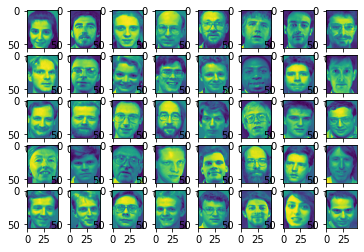

In [4]:
col_name = list(png_df.columns)
fig, ax = plt.subplots(5, 8)
k = 1

for i in col_name:
    #only show the last is _1.png
    match = re.search(r'\w*\s*\w*\/\d*\_1.png',i) 
    if match:
        # print(match.group(), k)
        plt.subplot(5,8,k)
        plt.imshow(png_df[i][0])
        k = k +1

## q1a

In [5]:
# define gender by hand, each value for 10 pictures
genders = [0,1,1,1,1,1,1,1,
           1,1,0,1,1,1,1,1,
           1,1,1,1,1,1,1,1,
           0,1,1,1,1,1,1,1,
           1,1,1,1,1,1,0,1]
dic = {}          
k = 0
# insert all gender to new row
for i in col_name:    
    match = re.search(r'\w*\s*\w*\/\d*\_1.png',i) 
    if match:
        #print(match.group(), k)
        k = k +1
    dic[i]=[genders[k-1]]
# add new row for png_df
#dic
#pd.DataFrame(dic)

df2 = pd.concat([png_df,pd.DataFrame(dic)]).reset_index(drop=True)

In [6]:

sample_df = df2.rename(index={0:'data',1:'gender'}).T

print('See how data looks like: \n', sample_df)
print('\n Check the dimension for each picture: ' , np.matrix(sample_df['data'][0]).shape)


See how data looks like: 
                                                                   data gender
ORL Faces/10_1.png   [[5.372549e-01, 0.5294118, 0.5294118, 0.529411...      0
ORL Faces/10_10.png  [[0.5137255, 0.5137255, 0.5137255, 0.50980395,...      0
ORL Faces/10_2.png   [[0.53333336, 0.53333336, 0.53333336, 0.533333...      0
ORL Faces/10_3.png   [[0.53333336, 0.5294118, 0.5372549, 0.5137255,...      0
ORL Faces/10_4.png   [[0.49019608, 0.47843137, 0.5176471, 0.5294118...      0
...                                                                ...    ...
ORL Faces/9_5.png    [[0.42745098, 0.43137255, 0.44313726, 0.435294...      1
ORL Faces/9_6.png    [[0.44313726, 0.4392157, 0.44705883, 0.4470588...      1
ORL Faces/9_7.png    [[0.43529412, 0.44313726, 0.4392157, 0.4470588...      1
ORL Faces/9_8.png    [[0.4392157, 0.4392157, 0.43529412, 0.44313726...      1
ORL Faces/9_9.png    [[0.43529412, 0.4392157, 0.4392157, 0.44313726...      1

[400 rows x 2 columns]

 Check the d

In [7]:
# flatten all pics data 
data_mat = np.array(np.ndarray.flatten(sample_df['data'][0]))
for i in range(1, len(sample_df)):
    data_mat = np.concatenate((data_mat,
         np.array(np.ndarray.flatten(sample_df['data'][i]))))
data_mat = data_mat.reshape(400,2576)
data_mat.shape

(400, 2576)

In [8]:
# using sklearn package

model = LinearRegression().fit(data_mat,sample_df['gender'])
r_sq = model.score(data_mat, sample_df['gender'])
print('R-square: ', r_sq)
print('beta_0 :', model.intercept_)
print('All other betas: ', model.coef_)

R-square:  0.9999999999874855
beta_0 : 0.9548377
All other betas:  [ 0.01370658  0.01892014  0.01960122 ... -0.00937706 -0.05215392
 -0.04657309]


In [9]:
# use statsmodel Ordinary least squred model package

# Fit a regression line to the data, and display the model results
X = pd.DataFrame(data_mat,index=sample_df.index)       # predictor variable(s)
#X = pd.DataFrame([range(400)])         # predictor variable(s)
y = list(sample_df['gender'])         # response variable
X = sm.add_constant(X)       # add the intercept term to the model

# Note the difference in argument order
model = sm.OLS(y, X).fit()   # sm.OLS(response variable, predictor(s))
fitted = model.predict(X)    # finds the fitted values (y_hat)

# Print out the statistics
print(model.summary())
# two linear models results are different. 

/home/jack/miniconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1751: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/jack/miniconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1751: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/home/jack/miniconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1673: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 06 Mar 2022   Prob (F-statistic):                nan
Time:                        09:43:08   Log-Likelihood:                 12661.
No. Observations:                 400   AIC:                        -2.452e+04
Df Residuals:                       0   BIC:                        -2.292e+04
Df Model:                         399                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2179        inf          0        n

## q1b
By implementing two package to compare, the $R^2$ is very promsing because of overfit, this case are all pixel preditors. This model can not represent a good model because OLS regression fail to show Adjusted $R^2$ and significant variables.  

In [10]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 10,forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X, y)


In [11]:
# check stepwise process 
sfs1.subsets_

{1: {'feature_idx': (2222,),
  'cv_scores': array([0.05625226, 0.05540667, 0.        , 0.12624565, 0.26327817]),
  'avg_score': 0.10023655165637194,
  'feature_names': (2221,)},
 2: {'feature_idx': (1470, 2222),
  'cv_scores': array([0.21350675, 0.12320214, 0.        , 0.03675544, 0.50358968]),
  'avg_score': 0.17541080125454706,
  'feature_names': (1469, 2221)},
 3: {'feature_idx': (1470, 2117, 2222),
  'cv_scores': array([0.32360951, 0.12585124, 0.        , 0.14500237, 0.65082201]),
  'avg_score': 0.2490570267096892,
  'feature_names': (1469, 2116, 2221)},
 4: {'feature_idx': (225, 1470, 2117, 2222),
  'cv_scores': array([0.49268465, 0.28072293, 0.        , 0.16605045, 0.61795473]),
  'avg_score': 0.3114825526689991,
  'feature_names': (224, 1469, 2116, 2221)},
 5: {'feature_idx': (225, 1470, 1984, 2117, 2222),
  'cv_scores': array([0.50140641, 0.31115182, 0.        , 0.17479529, 0.68545881]),
  'avg_score': 0.3345624660362567,
  'feature_names': (224, 1469, 1983, 2116, 2221)},
 6: {

In [12]:
print('Show the most important pixels', sfs1.k_feature_names_)

print('The prediction score is ', sfs1.k_score_)

Show the most important pixels (156, 224, 1190, 1469, 1983, 2116, 2182, 2221, 2399, 2449)
The prediction score is  0.44088542144247833


The significant pixels are ( 3 , 18 )
The significant pixels are ( 4 , 40 )
The significant pixels are ( 25 , 40 )
The significant pixels are ( 31 , 43 )
The significant pixels are ( 43 , 5 )
The significant pixels are ( 46 , 0 )
The significant pixels are ( 47 , 20 )
The significant pixels are ( 48 , 13 )
The significant pixels are ( 52 , 7 )
The significant pixels are ( 53 , 11 )


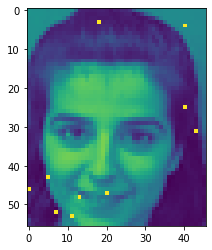

In [13]:
for i in sfs1.k_feature_names_:
    row = int(np.floor(i/np.matrix(sample_df['data'][0]).shape[1]) )
    col = i - row*np.matrix(sample_df['data'][0]).shape[1]
    print('The significant pixels are (',row, ',',col, ')')
    png_df['ORL Faces/10_1.png'][0][row][col]=1

plt.imshow(png_df['ORL Faces/10_1.png'][0])


# Q2

   86  85  84  83   82   81   80   79   78   77  ...   9    8    7    6    5   \
0  97  97  98  98   99   99   99   99  100  100  ...  108  107  106  105  105   
1  97  98  98  99   99  100  100  100  101  101  ...  109  108  107  106  105   
2  97  98  98  99   99  100  100  101  101  102  ...  109  108  107  106  105   
3  98  98  99  99   99  100  101  102  102  102  ...  110  109  108  107  106   
4  98  99  99  99  100  101  101  102  102  103  ...  110  109  108  107  106   

    4    3    2    1    0   
0  104  103  102  101  100  
1  104  103  102  101  100  
2  105  104  103  102  101  
3  105  104  103  102  101  
4  105  104  103  102  101  

[5 rows x 87 columns]
The data size (61, 87)


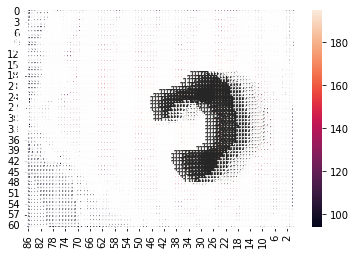

In [14]:

# get current working directory
cwd= os.getcwd()

# add the read directory to the path
rd = os.path.join(cwd)
# there are no header
volcano_df = pd.read_csv(os.path.join(rd, "Volcano.csv"),header=None)
# volcano_df.head()
volcano_df= volcano_df[volcano_df.columns[::-1]]# reverse the col orders
print(volcano_df.head())
# check how it looks like
sns.heatmap(volcano_df, annot=True)

print('The data size', volcano_df.shape)

In [43]:
def keepmoving(data , moving_rows=5, moving_cols=7 ,start_row=0 
, start_col=86, variation = 0):

    # make sure variation can't be greater than moving
    if variation> moving_cols or variation>moving_rows:
        print('variation can\'t be greater than moving steps')
        return 

    hight = []
    k = 0
    # add random variation, defalt is 0
    moving_cols = moving_cols + random.choices(range(-variation,variation+1), k=1)[0]
    moving_rows = moving_rows + random.choices(range(-variation,variation+1), k=1)[0]
    
    # def the area 
    if data.shape[0]< start_row + moving_rows:
        top =  data.shape[0]
    else:
        top = moving_rows + start_row
    if start_row - moving_rows<0:
        down = 0
    else:
        down = start_row - moving_rows
    if data.shape[1] < start_col + moving_cols:
        left = data.shape[1] -1 # prevent to be 87
    else:
        left = start_col + moving_cols-1
    if start_col - moving_cols <0:
        right = 0 # the most right is 0
    else:
        right = start_col - moving_cols

    # I found variation impact moving steps. sometimes will in same pos
    # add this to prevent errors.
    if top == down:
        top+=1
    if left ==right:
        left+=1
    #print(start_col)
    #print(top,down,right,left)
    pos_list = [[0]*2 for i in range((top-down)*(left-right))]
    for i in range(down, top):
        for j in range(left, right, -1):
            #print('k=',k)
            pos_list[k][0]=i
            pos_list[k][1]=j
            hight.append(data.loc[i,j])
            k+=1
    # print(pos_list)
    # print(hight)
    return pos_list,hight

In [46]:
epoch = 50
start = [0,86]
print('Start at (' ,start[0], ',' , start[1],')' , 
    'hight=',volcano_df.loc[start[0],start[1]])
best_pos_list = []
best_hight= []
flag = True
k = 1
# while flag:   # not the best way 
for i in range(1,epoch+1):
    print('Let\'s start {} time moving:'.format(k))
    pos_list,hight = keepmoving(volcano_df,start_row=start[0], start_col=start[1],variation=2)
    # regression 
    model = LinearRegression().fit(pos_list,hight)
    r_sq = model.score(pos_list, hight)
    # predict the best index
    index = np.argmax(model.predict(pos_list))

    #if k > 2 and best_hight[k-1] == hight[index]:
    #    flag = False
    
    best_hight.append(hight[index])
    best_pos_list.append(pos_list[index])
    print('Best at ' ,pos_list[index] , 'hight=',hight[index])
    start = pos_list[index]
    k+=1
best_index = np.argmax(best_hight)
print('The highest position is', best_hight[best_index],
        'when position is ' , best_pos_list[best_index])

Start at ( 0 , 86 ) hight= 97
Let's start 1 time moving:
Best at  [4, 80] hight= 101
Let's start 2 time moving:
Best at  [6, 76] hight= 105
Let's start 3 time moving:
Best at  [9, 68] hight= 126
Let's start 4 time moving:
Best at  [13, 61] hight= 143
Let's start 5 time moving:
Best at  [17, 53] hight= 148
Let's start 6 time moving:
Best at  [23, 46] hight= 169
Let's start 7 time moving:
Best at  [26, 39] hight= 179
Let's start 8 time moving:
Best at  [32, 33] hight= 161
Let's start 9 time moving:
Best at  [28, 39] hight= 178
Let's start 10 time moving:
Best at  [21, 32] hight= 170
Let's start 11 time moving:
Best at  [25, 27] hight= 179
Let's start 12 time moving:
Best at  [18, 21] hight= 172
Let's start 13 time moving:
Best at  [22, 25] hight= 181
Let's start 14 time moving:
Best at  [26, 18] hight= 190
Let's start 15 time moving:
Best at  [31, 23] hight= 169
Let's start 16 time moving:
Best at  [25, 17] hight= 186
Let's start 17 time moving:
Best at  [28, 22] hight= 183
Let's start 1

In [17]:
print('The real highest value in data is ' , max(volcano_df.iloc[:].max()))

The real highest value in data is  195


## q2 results
My methodoloty is set a range of area and the predict the response values.
The function can with or without variation because I would like like to add stochastics behaviors in order to better predict results.
- When I differ the variation and moving steps, the best I found is that the highest position is around 195.
- Sometimes the results is the identical with original data hghest point. 

# q3

In [18]:
size = 50000
b0 = 13
b1 = 3
b2 = 7
sample = np.array(random.sample(range(size*3), k=size*3)).reshape(size*3,1)
x1 = np.array(random.sample(range(size), k=size)).reshape(1,size)[0]
x2 = np.array(random.sample(range(size), k=size)).reshape(1,size)[0]

eps = [np.random.normal() for i in range(size)]
y = b0 + b1*x1 + b2*x2 + eps
df = pd.DataFrame({'x1':x1 , 'x2':x2})

model = LinearRegression().fit(df,y)

r_sq = model.score(df, y)
print('I tested the epsilon is standard normal R.V.')
print('R-square: ', r_sq)
print('beta_0 :', model.intercept_, ',whereas true beta_0 is', b0)
print('(b2,b2) is: ', model.coef_, ' ,the true (b1,b2) is' ,(b1,b2))


I tested the epsilon is standard normal R.V.
R-square:  0.9999999999174413
beta_0 : 12.99863440275658 ,whereas true beta_0 is 13
(b2,b2) is:  [2.99999987 7.00000002]  ,the true (b1,b2) is (3, 7)


In [19]:
sigma = 100
eps = [np.random.normal(scale=sigma) for i in range(size)]
y = b0 + b1*x1 + b2*x2 + eps
df = pd.DataFrame({'x1':x1 , 'x2':x2})

model = LinearRegression().fit(df,y)

r_sq = model.score(df, y)
print('I tested the epsilon is normal with sigma is',sigma)
print('R-square: ', r_sq)
print('beta_0 :', model.intercept_, ',whereas true beta_0 is', b0)
print('(b2,b2) is: ', model.coef_, ' ,the true (b1,b2) is' ,(b1,b2))

I tested the epsilon is normal with sigma is 100
R-square:  0.9999991796792111
beta_0 : 13.31814608030254 ,whereas true beta_0 is 13
(b2,b2) is:  [3.00001442 6.99998038]  ,the true (b1,b2) is (3, 7)


In [20]:

eps = [np.random.uniform() for i in range(size)]
y = b0 + b1*x1 + b2*x2 + eps
df = pd.DataFrame({'x1':x1 , 'x2':x2})

model = LinearRegression().fit(df,y)

r_sq = model.score(df, y)
print('I tested the epsilon is uniform R.V.')
print('R-square: ', r_sq)
print('beta_0 :', model.intercept_, ',whereas true beta_0 is', b0)
print('(b2,b2) is: ', model.coef_, ' ,the true (b1,b2) is' ,(b1,b2))

I tested the epsilon is uniform R.V.
R-square:  0.999999999993122
beta_0 : 13.501113239472033 ,whereas true beta_0 is 13
(b2,b2) is:  [2.99999985 7.00000009]  ,the true (b1,b2) is (3, 7)


 ## q3a results
- After simulate 5000 runs, I found the results is closed to true $\beta s$ in standard normal R.V.
- With higher $\sigma$, the intercept, $\beta_0$, is distored.
- The same behavior happened when $\epsilon$ is uniform R.V.

## q3b
- note: 
$$ sum \; of \; square=(y-\hat{y})^2 $$
- We need to differentiate for $\beta_0, \beta_1, \beta_2$ in this case in order to find the minimum value.
- Take $\beta_0$ as example:
$$\frac{\partial}{\partial \beta_0} (sum \; of \; square)= -2(y - \hat{h})$$
- The same fasion in $\beta_1$ and $\beta_2$ 
$$\frac{\partial}{\partial \beta_1} (sum \; of \; square)= -2x_1(y - \hat{h})$$
$$\frac{\partial}{\partial \beta_2} (sum \; of \; square)= -2x_2(y - \hat{h})$$
- the next point for $\beta_0, \beta_1, \beta_2$ is 
$$new \; point = old \; point - learning \; rate \times partial \; derivative$$ 


In [21]:
# define functions

def fnc(b0,b1,b2,x1,x2, eps = 0):
    y = b0 + x1*b1 + x2*b2 +eps
    return y

def partial_b0(error):
    return -2*sum(error)

def partial_b1(error, x1):
    return -2*sum(error * x1)

def partial_b2(error, x2):
    return -2*sum(error *x2)

def sum_error_sqrt(error):
    val = sum((error)**2)
    return val

In [37]:
# start arbitrary beta 
# new_b0 = 11
# new_b1 = 3
# new_b2 = 7
# initialize paremeters
size = 50000
b0 = 13
b1 = 5
b2 = 7
# x1 = np.array(random.sample(range(size), k=size)).reshape(1,size)[0]
# x2 = np.array(random.sample(range(size), k=size)).reshape(1,size)[0]

x1 = np.array([np.random.uniform() for i in range(size)])
x2 = np.array([np.random.uniform() for i in range(size)])
eps = np.array([np.random.normal() for i in range(size)])
y = fnc(b0,b1,b2,x1,x2,eps) # true y value
epoch = 100
rate = .1
tolerance = 1e-3
error = 0
errors_list = []

for i in range(epoch):
    # error = y - fnc(b0=new_b0,b1=new_b1,b2=new_b2,x1=x1,x2=x2,eps=0)
    error = y - fnc(b0,b1,b2,x1,x2,eps=0)
    diff = np.array([rate*partial_b0(error)/size , 
                     rate*partial_b1(error, x1)/size,rate*partial_b2(error, x2)/size])
    # if np.all(np.abs(diff) <= tolerance):
    #         break
    errors_list.append(sum_error_sqrt(error))
    print('The sum of square residual ', sum_error_sqrt(error))
    
    b0 -= diff[0]
    b1 -= diff[1]
    b2 -= diff[2]
    #print(b0,b1,b2)
    # new_b0 = new_b0 - rate*partial_b0(error)
    # new_b1 = new_b0 - rate*partial_b1(error, x1)
    # new_b2 = new_b2 - rate*partial_b2(error, x2)
# print('The final result for (b0, b1, b2) ', (new_b0, new_b1, new_b2))
print('My learning rate is', rate, 'break tolerance is ', tolerance)
print('The final result for (b0, b1, b2) ', np.round((b0, b1, b2),5))


The sum of square residual  49245.995038267225
The sum of square residual  49245.524007780004
The sum of square residual  49245.275762679135
The sum of square residual  49245.135324196766
The sum of square residual  49245.047321654725
The sum of square residual  49244.98508284404
The sum of square residual  49244.9357527138
The sum of square residual  49244.89312880691
The sum of square residual  49244.854211909405
The sum of square residual  49244.81754536197
The sum of square residual  49244.78241550724
The sum of square residual  49244.74846675336
The sum of square residual  49244.71551622787
The sum of square residual  49244.683464540416
The sum of square residual  49244.65225280379
The sum of square residual  49244.62184193668
The sum of square residual  49244.59220269157
The sum of square residual  49244.56331084237
The sum of square residual  49244.535144859416
The sum of square residual  49244.50768478523
The sum of square residual  49244.480911678846
The sum of square residual

## q3b results and comments
The residuals will go down by gradient step. However, I found sometimes learning rate too large. The residuals results will to up. It will be hard to check what learning rate is suiteble for my model.

In [38]:
# test only. modified from
# https://medium.com/analytics-vidhya/gradient-descent-in-3-cells-f308a7c0f0bf
def gradient_step(current_b0, current_b1 ,current_b2, points, learningRate):
    totalPoints = len(points)
    stepped_b0 = 0
    stepped_b1 = 0
    stepped_b2 = 0
   
    for point in points:
        y = point[0]
        x1 = point[1]
        x2 = point[2]
        error = y - ((current_b1 * x1) + (current_b2 * x2) + current_b0)
        stepped_b0 += -(2 / totalPoints) * error
        stepped_b1 += -(2 / totalPoints) * x1 * error          
        stepped_b2 += -(2 / totalPoints) * x2 * error          
   
    new_b0 = current_b0 - (learningRate * stepped_b0)
    new_b1 = current_b1 - (learningRate * stepped_b1)
    new_b2 = current_b2 - (learningRate * stepped_b2)
       
    return new_b0, new_b1, new_b2

In [40]:
list1 = []

b0 = 13
b1 = 3
b2 = 7
for i in range(len(y)):
    list1.append([y[i], x1[i], x2[i]])
for i in range(epoch):
    b0, b1, b2=    gradient_step(b0,b1,b2,list1,rate)
    
print(np.round([b0,b1,b2],5)) 

[13.23636  4.59553  6.95184]
